# **Social Network Analysis and Clustering of Country Relationships Using Graph Theory**


### **Subtitle: Uncovering Global Patterns with Network Clustering:**
**"Leveraging Community Detection to Understand International Relations and Key Influencers"**

### **Key Components for the Project:**


1. **Problem Statement:**
   - Understand the relationship dynamics between countries using network analysis techniques.
   - Identify key clusters (communities) and influential countries.


2. **Project Goals:**
   - Visualize connections and interactions between countries using graph-based methods.
   - Implement community detection algorithms to reveal clusters of countries with strong interrelations.
   - Analyze centrality measures (e.g., Degree Centrality, PageRank) to highlight influential nodes (countries).


3. **Technical Tools:**
   - **Libraries Used:** NetworkX, Matplotlib, Seaborn, Community-Louvain.
   - **Community Detection Algorithms:** Louvain Method, Greedy Modularity, Girvan-Newman.
   - **Visualization Methods:** MatrixPlot, CircosPlot, and customized graph visualizations.

    

4. **Expected Outcomes:**
   - Clusters of countries based on the strength of relationships.
   - Identification of the most central and influential countries in the network.
   - Enhanced visual representation of global relationships for further analysis.


In [ ]:
import nxviz as nv

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

print("All necessary libraries are installed and working correctly!")


All necessary libraries are installed and working correctly!


In [21]:
from pathlib import Path
import requests
import networkx as nx
import nxviz as nv  # using v0.7.4
from nxviz import annotate
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp
from itertools import combinations
import random
from collections import Counter, defaultdict
import pickle

In [20]:
print(f'NetworkX version: {nx.__version__}')
print(f'Matplotlib version: {mpl.__version__}')

NetworkX version: 3.1
Matplotlib version: 3.9.2




## **Data Understanding**

The dataset used in this project represents relationships between different countries. Each row in the dataset shows a pair of countries and additional details about their connection. Let’s break down the data in simpler terms:

### **1. What Does Each Row Represent?**
- Each row in the dataset shows a **relationship** between two countries.
- For example, if the row has "USA" and "Canada," it means there is some form of interaction or connection between these two countries.

### **2. What Columns Do We Need?**
- The original dataset has many columns that aren’t necessary for analyzing relationships. Some of these columns include colors, styles, and other visual properties.
- For our analysis, we only need two key columns:
  - **Source**: The first country in the relationship.
  - **Target**: The second country in the relationship.

### **3. Data Cleaning and Selection:**
- We selected only the **Source** and **Target** columns to create a simpler dataset focused on connections between countries.
- Here’s a snapshot of the cleaned dataset:

| **Source** | **Target** |
|------------|------------|
| UK         | Syria      |
| Syria      | UK         |
| USA        | Qatar      |
| Qatar      | USA        |
| Belgium    | USA        |

- This cleaned dataset has **501 rows** and just **two columns**, representing various connections between countries.

### **4. Summary of the Dataset:**
- The data contains **501 relationships** between **60 different countries**.
- Some countries have multiple relationships, indicating that they are highly connected to many other countries.



In [34]:
import pandas as pd

# Step 2: Define the path to your Excel file
data_path = "Network_analysis_data.xlsx"  # Replace with the path to your Excel file

# Step 3: Read the Excel file into a pandas DataFrame
network_data = pd.read_excel(data_path)

# Step 4: Display the first few rows of the dataset
display(network_data)


,Unnamed: 0,Unnamed: 1,Visual Properties,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Labels,Unnamed: 8,Unnamed: 9,Graph Metrics,Do Not Edit,Unnamed: 12,Other Columns,Unnamed: 14
0,Vertex 1,Vertex 2,Color,Width,Style,Opacity,Visibility,Label,Label Text Color,Label Font Size,Reciprocated?,ID,Dynamic Filter,Add Your Own Columns Here,Edge Weight
1,Uk,Syria,"192, 192, 192",1,NaN,NaN,NaN,NaN,NaN,NaN,Yes,3,NaN,NaN,1
2,Syria,Uk,"192, 192, 192",1,NaN,NaN,NaN,NaN,NaN,NaN,Yes,4,NaN,NaN,1
3,Usa,Qatar,"192, 192, 192",1.077253,NaN,NaN,NaN,NaN,NaN,NaN,Yes,5,NaN,NaN,3
4,Qatar,Usa,"192, 192, 192",1.077253,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Belgium,Usa,"192, 192, 192",1,NaN,NaN,NaN,NaN,NaN,NaN,Yes,498,NaN,NaN,1
497,Belgium,Australia,"192, 192, 192",1,NaN,NaN,NaN,NaN,NaN,NaN,Yes,499,NaN,NaN,1
498,Australia,Belgium,"192, 192, 192",1,NaN,NaN,NaN,NaN,NaN,NaN,Yes,500,NaN,NaN,1
499,Usa,Australia,"208, 143, 143",3.356223,NaN,NaN,NaN,NaN,NaN,NaN,Yes,501,NaN,NaN,62


In [39]:
# Display the first few rows of the DataFrame
display(network_data.head())

# Display summary information about the data
network_data.info()

# Check for any missing values in the dataset
print("\nMissing Values:\n", network_data.isnull().sum())

# Display descriptive statistics for numerical columns
display(network_data.describe())


,Unnamed: 0,Unnamed: 1,Visual Properties,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Labels,Unnamed: 8,Unnamed: 9,Graph Metrics,Do Not Edit,Unnamed: 12,Other Columns,Unnamed: 14
0,Vertex 1,Vertex 2,Color,Width,Style,Opacity,Visibility,Label,Label Text Color,Label Font Size,Reciprocated?,ID,Dynamic Filter,Add Your Own Columns Here,Edge Weight
1,Uk,Syria,"192, 192, 192",1,NaN,NaN,NaN,NaN,NaN,NaN,Yes,3,NaN,NaN,1
2,Syria,Uk,"192, 192, 192",1,NaN,NaN,NaN,NaN,NaN,NaN,Yes,4,NaN,NaN,1
3,Usa,Qatar,"192, 192, 192",1.077253,NaN,NaN,NaN,NaN,NaN,NaN,Yes,5,NaN,NaN,3
4,Qatar,Usa,"192, 192, 192",1.077253,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6,NaN,NaN,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         501 non-null    object
 1   Unnamed: 1         501 non-null    object
 2   Visual Properties  501 non-null    object
 3   Unnamed: 3         501 non-null    object
 4   Unnamed: 4         1 non-null      object
 5   Unnamed: 5         1 non-null      object
 6   Unnamed: 6         1 non-null      object
 7   Labels             1 non-null      object
 8   Unnamed: 8         1 non-null      object
 9   Unnamed: 9         1 non-null      object
 10  Graph Metrics      501 non-null    object
 11  Do Not Edit        501 non-null    object
 12  Unnamed: 12        1 non-null      object
 13  Other Columns      1 non-null      object
 14  Unnamed: 14        501 non-null    object
dtypes: object(15)
memory usage: 58.8+ KB

Missing Values:
 Unnamed: 0             0
Unnamed: 1 

,Unnamed: 0,Unnamed: 1,Visual Properties,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Labels,Unnamed: 8,Unnamed: 9,Graph Metrics,Do Not Edit,Unnamed: 12,Other Columns,Unnamed: 14
count,501,501,501,501,1,1,1,1,1,1,501,501,1,1,501
unique,60,60,16,40,1,1,1,1,1,1,2,501,1,1,40
top,Usa,Usa,"192, 192, 192",1,Style,Opacity,Visibility,Label,Label Text Color,Label Font Size,Yes,ID,Dynamic Filter,Add Your Own Columns Here,1
freq,46,46,372,176,1,1,1,1,1,1,500,1,1,1,176


In [42]:
# Check the column names in the DataFrame
print("Column Names in the DataFrame:", network_data.columns)


Column Names in the DataFrame: Index(['Unnamed: 0', 'Unnamed: 1', 'Visual Properties', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Labels', 'Unnamed: 8',
       'Unnamed: 9', 'Graph Metrics', 'Do Not Edit', 'Unnamed: 12',
       'Other Columns', 'Unnamed: 14'],
      dtype='object')


In [51]:
# Assuming your original DataFrame is named `network_data`
# Step 1: Select only the necessary columns
filtered_data = network_data[['Unnamed: 0', 'Unnamed: 1']]

# Step 2: Rename columns to 'Source' and 'Target'
filtered_data.columns = ['Source', 'Target']

# Step 3: Display the filtered DataFrame to confirm
display(filtered_data)


,Source,Target
0,Vertex 1,Vertex 2
1,Uk,Syria
2,Syria,Uk
3,Usa,Qatar
4,Qatar,Usa
...,...,...
496,Belgium,Usa
497,Belgium,Australia
498,Australia,Belgium
499,Usa,Australia


## **Saving Filtered Data to a CSV File**

In this step, we are saving the cleaned and filtered data (which only includes the necessary columns for our analysis) to a CSV file. This allows us to store the refined version of our dataset in a simpler format for future use and easy access. 


### **Why Is This Step Important?**
- Saving the cleaned data into a CSV file ensures that we have a **readable, portable** version of the dataset for further analysis or sharing.
- This file can be opened in various tools like Excel or imported back into Python for additional processing.



In [53]:
# Step 1: Define the file path where you want to save the file
# Example: Save it to the Desktop or a specific folder on your Mac
file_path = "/Users/mohammedalqarni/Desktop/filtered_network_data.csv"  # Change this path as needed

# Step 2: Save the filtered DataFrame to a CSV file
filtered_data.to_csv(file_path, index=False)

print(f"Filtered data saved successfully to {file_path}")


Filtered data saved successfully to /Users/mohammedalqarni/Desktop/filtered_network_data.csv


### **Visualizing the Network Graph with Customized Node and Edge Styling**

### **Brief Explanation:**

This section of the project focuses on creating a visually enhanced graph of the country relationships using **NetworkX**. The graph is customized to improve clarity and readability by implementing the following features:

1. **Graph Creation:** The `Source` and `Target` columns from the dataset are used to create a network graph.
2. **Spring Layout:** The nodes are positioned using the `spring_layout` algorithm, which simulates a force-directed layout to spread the nodes more evenly.
3. **Node and Edge Styling:** Nodes are displayed as circles with a consistent color (`skyblue`) and black borders. The edges between nodes are styled using different widths and colors.
4. **Labels with Bounding Boxes:** Node labels are displayed in bold font with a white background to prevent overlap and ensure the text is readable.
5. **Edge Directionality:** Optional arrows are added to the edges for indicating directionality, if needed.
6. **Title and Display:** The graph is displayed with a title for easy interpretation of the relationships.

By implementing these customizations, the graph provides a clear visual representation of country interactions, highlighting the structure and layout of the network.



/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/py

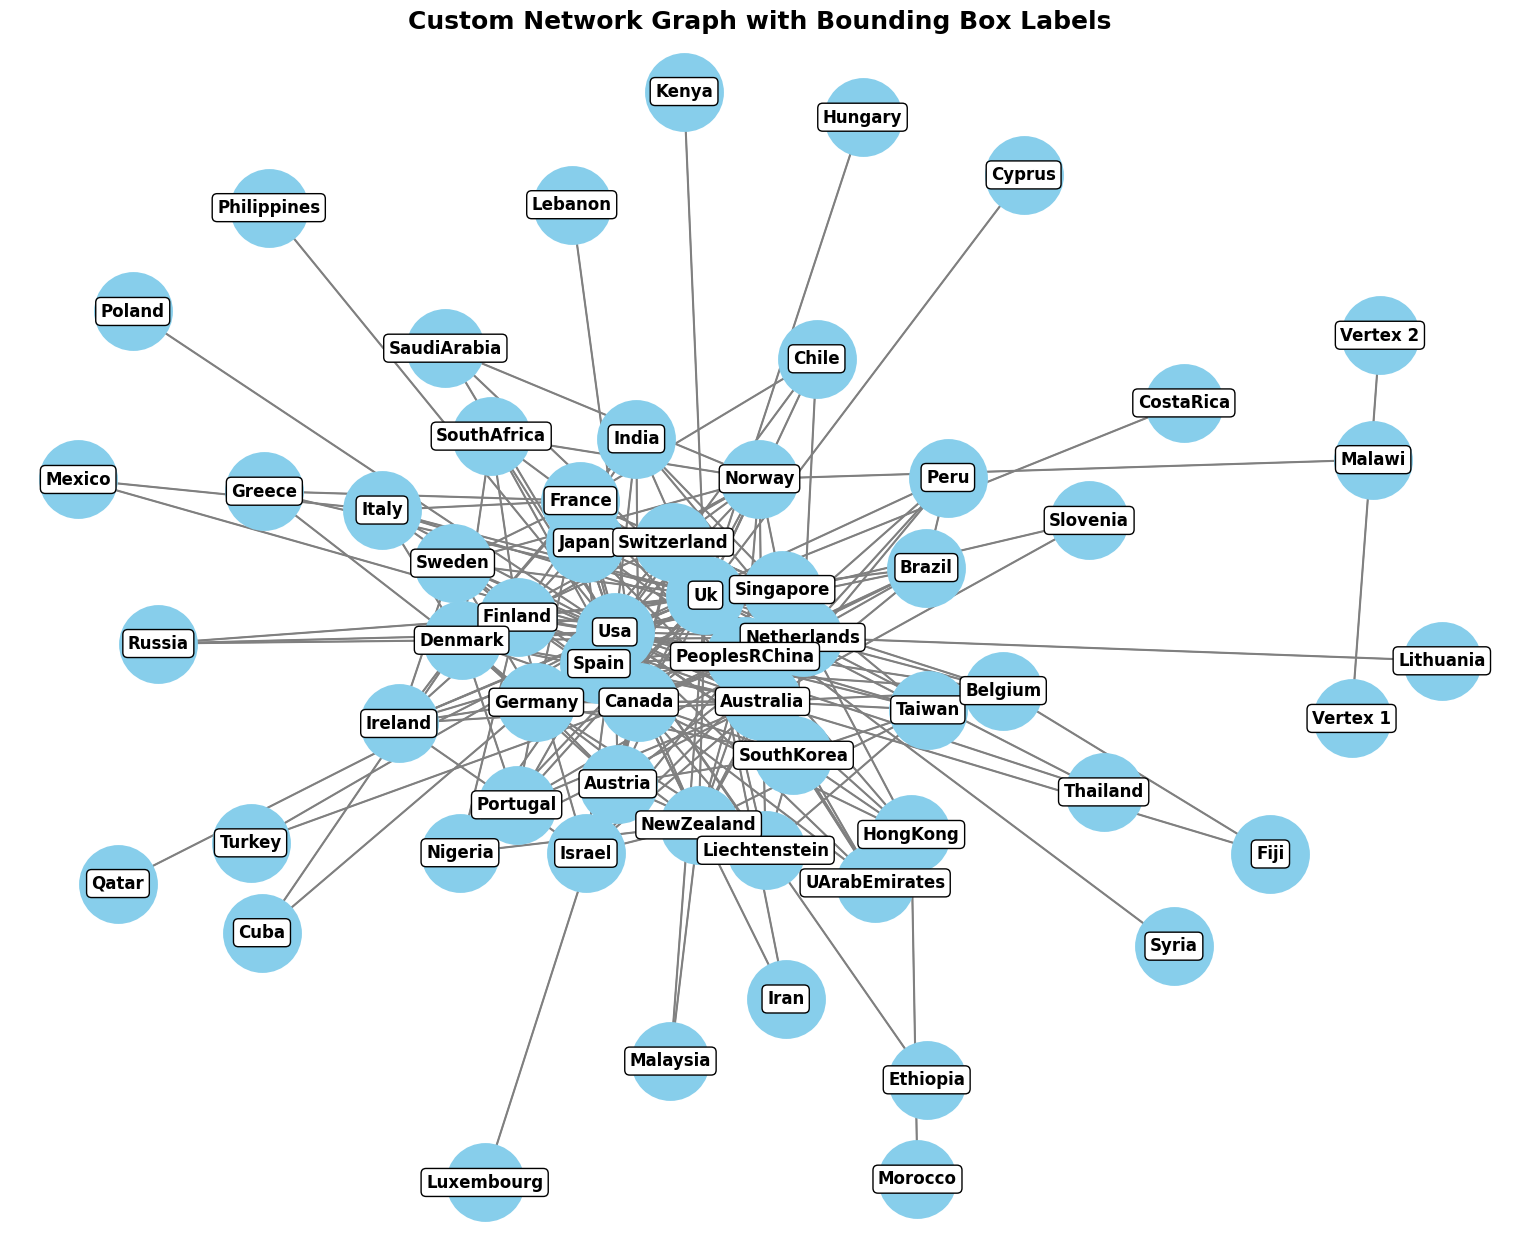

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read your Excel file and process it
file_path = "filtered_network_data.xls"
network_data = pd.read_excel(file_path)
network_data = network_data.rename(columns={network_data.columns[0]: 'Source', network_data.columns[1]: 'Target'})

# Create the graph
G = nx.from_pandas_edgelist(network_data, source='Source', target='Target')

# Use spring layout with increased spacing
pos = nx.spring_layout(G, k=1.2, iterations=100)  

# Draw the graph without labels
plt.figure(figsize=(15, 12))
nx.draw(G, pos, node_size=3000, node_color='skyblue', edge_color='gray', linewidths=2, width=1.5)

# Draw labels separately with bounding boxes for spacing
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold',
                                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Draw edges with arrows for better clarity (optional)
nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color='gray')

# Set the title and display
plt.title("Custom Network Graph with Bounding Box Labels", fontsize=18, fontweight='bold')
plt.show()


In [110]:
from pyvis.network import Network

# Create a PyVis Network object
net = Network(notebook=True)

# Add nodes and edges to the network from your DataFrame
for index, row in network_data.iterrows():
    net.add_node(row['Source'], label=row['Source'])
    net.add_node(row['Target'], label=row['Target'])
    net.add_edge(row['Source'], row['Target'])

# Customize node and edge appearance
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 16
    },
    "scaling": {
      "min": 10,
      "max": 30
    },
    "shadow": {
      "enabled": true
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "smooth": {
      "type": "continuous"
    }
  },
  "physics": {
    "enabled": true,
    "solver": "forceAtlas2Based",
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.01,
      "springLength": 230,
      "springConstant": 0.09,
      "damping": 0.4
    }
  }
}
""")

# Show the interactive network
net.show("social_network.html")


social_network.html


In [14]:
# Step 1: Calculate Basic Network Properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Step 2: Calculate Centrality Metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Step 3: Display Top 5 Nodes by Degree Centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
print("\nTop 5 Nodes by Degree Centrality:")
for node, centrality in sorted_degree[:5]:
    print(f"Node: {node}, Degree Centrality: {centrality:.4f}")

# Step 4: Add Centrality Metrics to Nodes for Visualization
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')


Number of nodes: 61
Number of edges: 250

Top 5 Nodes by Degree Centrality:
Node: Usa, Degree Centrality: 0.7500
Node: Uk, Degree Centrality: 0.6333
Node: Australia, Degree Centrality: 0.4833
Node: Canada, Degree Centrality: 0.4667
Node: Netherlands, Degree Centrality: 0.4167


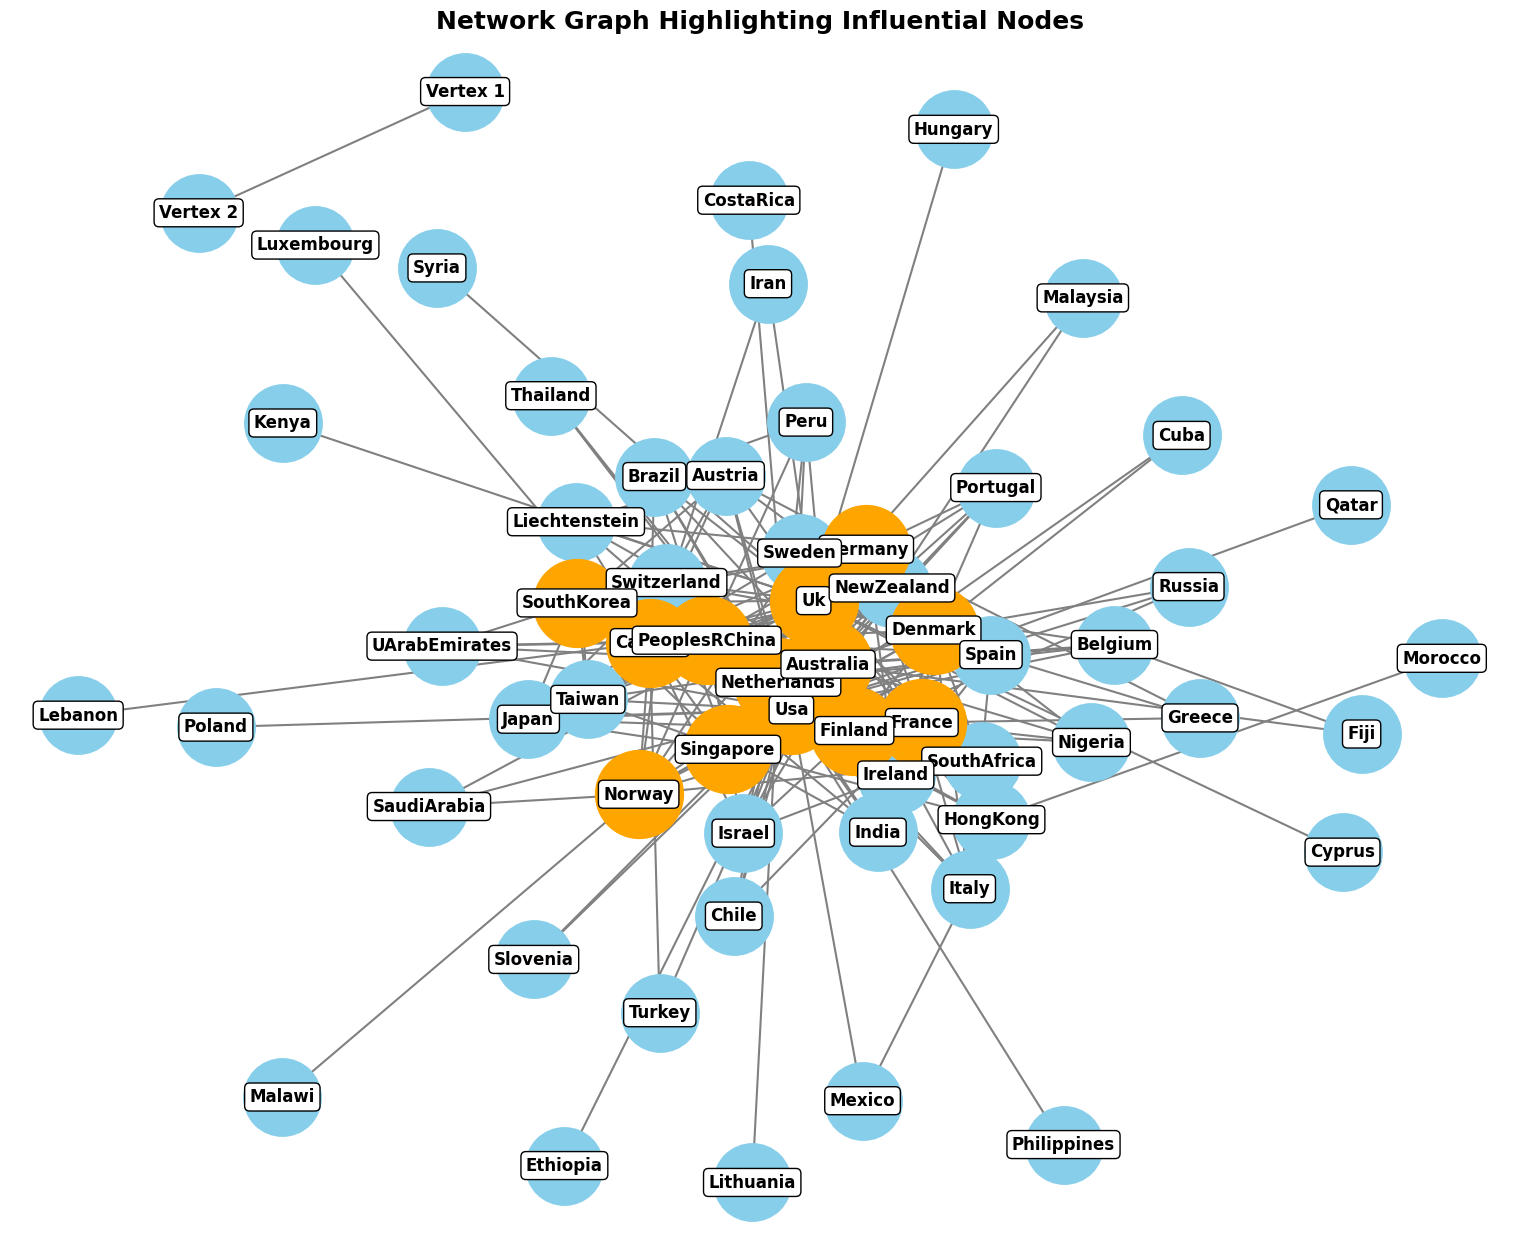

In [15]:
# Step 1: Identify Nodes with High Degree Centrality
high_centrality_nodes = [node for node, centrality in degree_centrality.items() if centrality > 0.2]  # Adjust threshold as needed

# Step 2: Draw the Network with Highlighted Influential Nodes
plt.figure(figsize=(15, 12))
nx.draw(G, pos, node_size=3000, node_color='skyblue', edge_color='gray', linewidths=2, width=1.5)
nx.draw_networkx_nodes(G, pos, nodelist=high_centrality_nodes, node_color='orange', node_size=4000)  # Highlight nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Set the title and display
plt.title("Network Graph Highlighting Influential Nodes", fontsize=18, fontweight='bold')
plt.show()


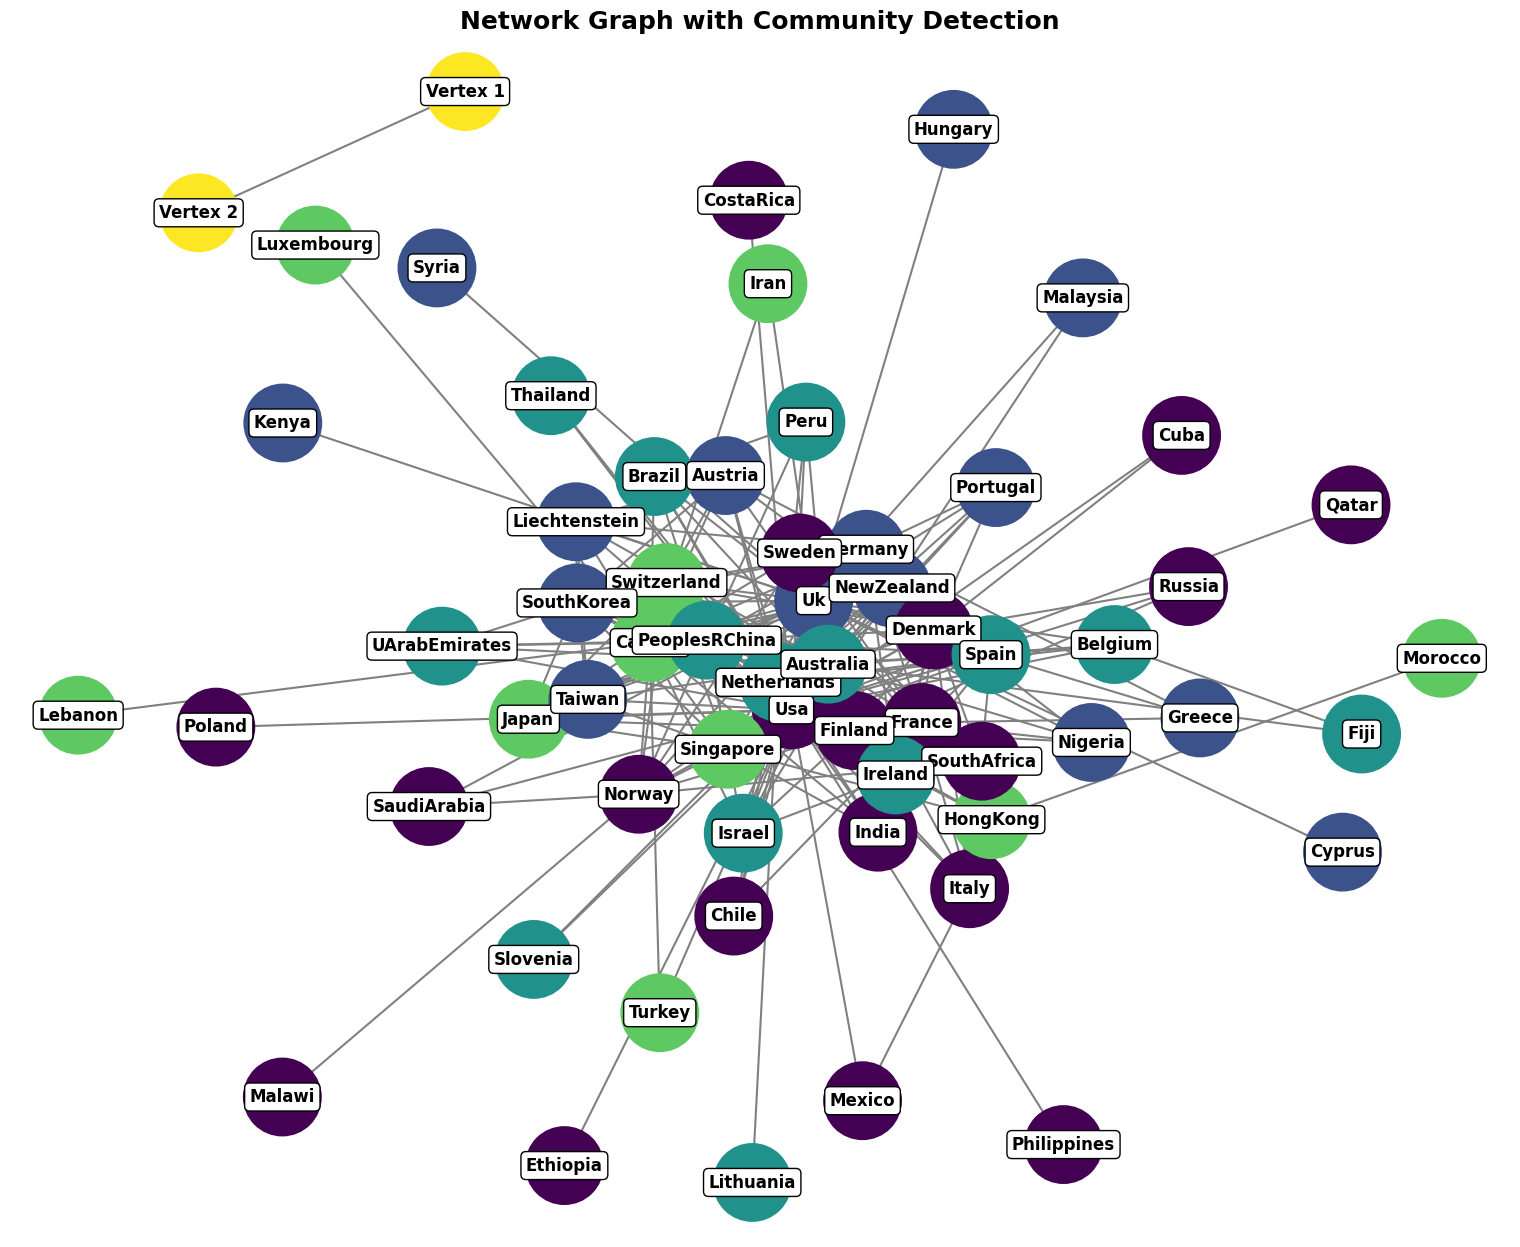

In [16]:
from networkx.algorithms import community

# Step 1: Detect Communities Using Greedy Modularity Algorithm
communities = community.greedy_modularity_communities(G)

# Step 2: Assign Colors to Communities
community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i

# Step 3: Visualize the Graph with Community Colors
plt.figure(figsize=(15, 12))
colors = [community_map[node] for node in G.nodes()]
nx.draw(G, pos, node_size=3000, node_color=colors, cmap=plt.cm.get_cmap('viridis'), edge_color='gray', linewidths=2, width=1.5)

# Draw labels and set the title
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.title("Network Graph with Community Detection", fontsize=18, fontweight='bold')
plt.show()




## **Understanding Centrality: Measuring Connections and Influence Between Countries**

This title highlights that the focus is on centrality measures and their role in understanding relationships and influence in the network.

### **Degree Centrality (How Connected a Node is)**
Degree Centrality helps us understand how many direct connections (or friends) a country has in the network. Imagine you’re looking at a map of friendships, and each country is a person. If a country has a lot of connections to other countries, it means it has many "friends" and is more "popular." The more connections a country has, the higher its **Degree Centrality**.

In this analysis, countries with a high degree centrality have a lot of relationships with other countries, making them more connected and potentially influential in global interactions.

### **Betweenness Centrality (Acting as a Bridge)**
Betweenness Centrality looks at which countries are playing the role of "bridge" between others. Think of this as a person who connects two groups of friends. If you want to send a message from one group to another, it would go through this "bridge" person. A country with high **Betweenness Centrality** is important because it sits between other countries and helps information (or influence) flow from one part of the network to another.

In global relations, countries with high betweenness can connect distant or disconnected countries, giving them the power to influence or control the flow of resources or information.


Data successfully loaded from 'network_centrality_metrics.csv'.

Column Names in the Dataset:
['Node', 'Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Community']

Preview of the First 5 Rows:
       Node  Degree Centrality  Betweenness Centrality  Closeness Centrality  \
0  Vertex 1           0.483333                0.072242              0.644444   
1  Vertex 2           0.150000                0.000487              0.509697   
2        Uk           0.100000                0.006799              0.491813   
3     Syria           0.116667                0.001123              0.505105   
4       Usa           0.466667                0.107913              0.637121   

   Community  
0          2  
1          1  
2          2  
3          2  
4          3  

The dataset contains 61 rows and 5 columns.


/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/py

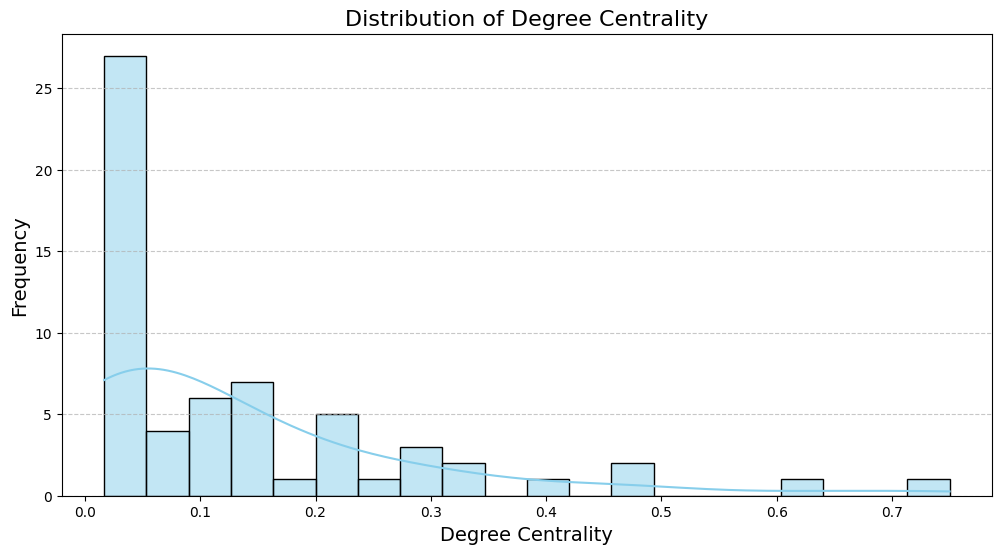

/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mohammedalqarni/anaconda3/lib/python3.11/site-packages/IPython/core/py

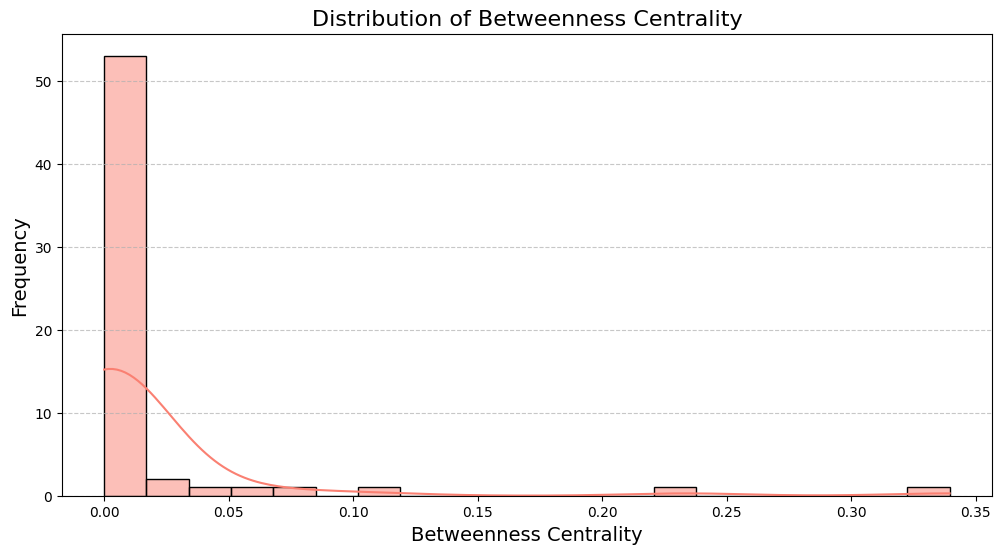

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the file path for the edge data CSV file
file_path = "network_centrality_metrics.csv"  # Replace with your actual file path

# Step 2: Load the edge data from the CSV file into a pandas DataFrame
try:
    edge_data = pd.read_csv(file_path)
    print(f"Data successfully loaded from '{file_path}'.\n")
except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found. Please check the file path.")
    exit()

# Step 3: Display the column names and the first few rows of the DataFrame
print("Column Names in the Dataset:")
print(edge_data.columns.to_list())  # Convert to list for better readability
print("\nPreview of the First 5 Rows:")
print(edge_data.head())

# Optional: Display the shape of the DataFrame (rows, columns)
print(f"\nThe dataset contains {edge_data.shape[0]} rows and {edge_data.shape[1]} columns.")

# Step 4: Visualize the distribution of the Degree Centrality
plt.figure(figsize=(12, 6))
sns.histplot(edge_data['Degree Centrality'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Degree Centrality', fontsize=16)
plt.xlabel('Degree Centrality', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Fixed alpha to 0.7
plt.show()

# Step 5: Visualize the Betweenness Centrality
plt.figure(figsize=(12, 6))
sns.histplot(edge_data['Betweenness Centrality'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Betweenness Centrality', fontsize=16)
plt.xlabel('Betweenness Centrality', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# You can add similar plots for other numerical columns as needed.


## Conclusion

This project successfully utilized **network analysis** and **community detection** techniques to uncover relationship dynamics between countries. By visualizing these connections through customized network graphs, we identified key clusters (communities) and influential countries based on centrality metrics such as **Degree Centrality** and **Betweenness Centrality**.

Using algorithms like **Louvain** and **Greedy Modularity**, we detected clusters that highlight groups of countries with stronger interrelations. The application of **graph theory** and **network clustering** revealed global patterns in international relations, providing a clear visualization of how countries are connected.

The analysis highlights:
- Clusters of countries with dense connections.
- Key influencers in the network, like the **USA** and **UK**, identified through high centrality scores.
- An enhanced understanding of global interactions and how communities form based on relationships.

These insights provide a foundation for further analysis of geopolitical and trade relationships, potentially offering new perspectives on international collaborations and influence.

